## INTRODUCTION
The notebook mainly focuses on sentiment analysis for the dataset of hotels of Europe.
Below are all the packages that are required to perform various operations on the data.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

515k-hotel-reviews-data-in-europe
negwords
poswords



In [3]:
import matplotlib as plt
import seaborn as sns

from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split

import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

english_stemmer=nltk.stem.SnowballStemmer('english')

# Visualization
%matplotlib inline

In [4]:
# Loading data
raw_df = pd.read_csv('../input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv')

In [5]:
raw_df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [6]:
poslist=[]
qbfile = open("../input/poswords/positive-words.txt","r")

for aline in qbfile.readlines():
    values = aline.split()
    poslist.extend(values)
print(poslist)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [7]:
neglist=[]
qbfile = open("../input/negwords/negative-words.txt","r",encoding = "ISO-8859-1")

for aline in qbfile.readlines():
    values = aline.split()
    neglist.extend(values)
print(neglist)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

## DATA PREPROCESSING
The original data has 515738 rows and 17 attributes. It is very important to remove all the unwanted columns to make data operations faster.
Here, I will drop below columns:
1.  Reviewer_Nationality
2.  Tags
3. days_since_review
4. Review_Date


In [8]:
raw_df.shape

(515738, 17)

In [9]:
df=raw_df.drop(raw_df.columns[[2, 5, 13, 14]], axis=1)

In [10]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Average_Score',
       'Hotel_Name', 'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng'],
      dtype='object')

In [11]:
df.shape

(515738, 13)

Below data shows that unwanted fields have been removed. This reduces the complexity of data

In [12]:
 df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,52.360576,4.915968


In [13]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [14]:
def reformatReview(review, remove_stopwords=True):
    # 1. Remove HTML
    review_text = BeautifulSoup(review, "lxml").get_text()
    
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [15]:
clean_positive_reviews = []      
for index,row in raw_df.iterrows():
    clean_positive_reviews.extend(reformatReview(row['Positive_Review']))

In [16]:
clean_negative_reviews = []
for index,row in raw_df.iterrows():
    clean_negative_reviews.extend(reformatReview(row['Negative_Review']))

In [19]:
set_positive_reviews=set(clean_positive_reviews)
set_negative_reviews=set(clean_negative_reviews)

In [20]:
raw_df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [21]:
positive_features = [(word_feats(pos), 'pos') for pos in set_positive_reviews]
negative_features = [(word_feats(neg), 'neg') for neg in set_negative_reviews]

train_set = negative_features + positive_features

# Naive Bayes Classification Algorithm
classifier = NaiveBayesClassifier.train(train_set)

posreview=[]
negreview=[]

for index,row in raw_df.iterrows():
    # Predict
    neg = 0
    pos = 0
    user_review = row['Positive_Review']+" "+row['Negative_Review']
    sentence=" ".join(reformatReview(user_review))
# sentence=" ".join(reformatReview(" angri great great great great high made post"))
# sentence = sentence.lower()
    words = sentence.split(' ')
    for word in words:
        classResult = classifier.classify(word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    posreview.append(str(float(pos)/len(words)))
    negreview.append(str(float(neg)/len(words)))
#     print('Positive: ' + str(float(pos)/len(words)))
#     print('Negative: ' + str(float(neg)/len(words)))
positive = pd.Series(posreview)
negative = pd.Series(negreview)
raw_df['Positive_Probability']=positive.values
raw_df['Negative_Probability']=negative.values

In [22]:
sentiment=[]
for index,row in raw_df.iterrows():
    if((float(row['Positive_Probability'])-float(row['Negative_Probability']))>0):
        sentiment.append("Positive")
    else:
        sentiment.append("Negative")
sentimentlist=pd.Series(sentiment)
raw_df['Sentiment']=sentimentlist.values

In [23]:
pd.value_counts(raw_df.Sentiment)

Positive    478811
Negative     36927
Name: Sentiment, dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
posReview=[]
for index,rows in raw_df.iloc[:405].iterrows():
    posReview.append(" ".join(reformatReview(rows['Positive_Review'])))

In [30]:
tokenize = lambda doc: doc.lower().split(" ")
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)
tfidf_matrix =  sklearn_tfidf.fit_transform(posReview)
feature_names = sklearn_tfidf.get_feature_names() 
# sklearn_representation = sklearn_tfidf.fit_transform(posReview)
# feature_names

In [31]:
tfidf_matrix

<405x1014 sparse matrix of type '<class 'numpy.float64'>'
	with 4674 stored elements in Compressed Sparse Row format>

In [32]:
dense = tfidf_matrix.todense()
episode = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]

In [34]:
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phraselist=[]
scorelist=[]
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
    print('{0: <20} {1}'.format(phrase, score))
    phraselist.append(phrase)
    scorelist.append(score)

outsid               0.682837095066096
park                 0.4666547353793227
beauti               0.4609567157164638
hotel                0.3216920356266857


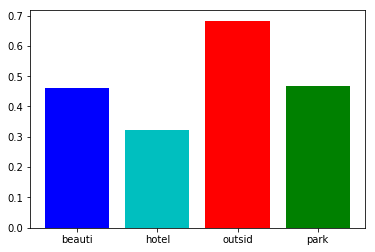

In [38]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'c']
plt.bar(phraselist, scorelist, color= colors)
plt.show()

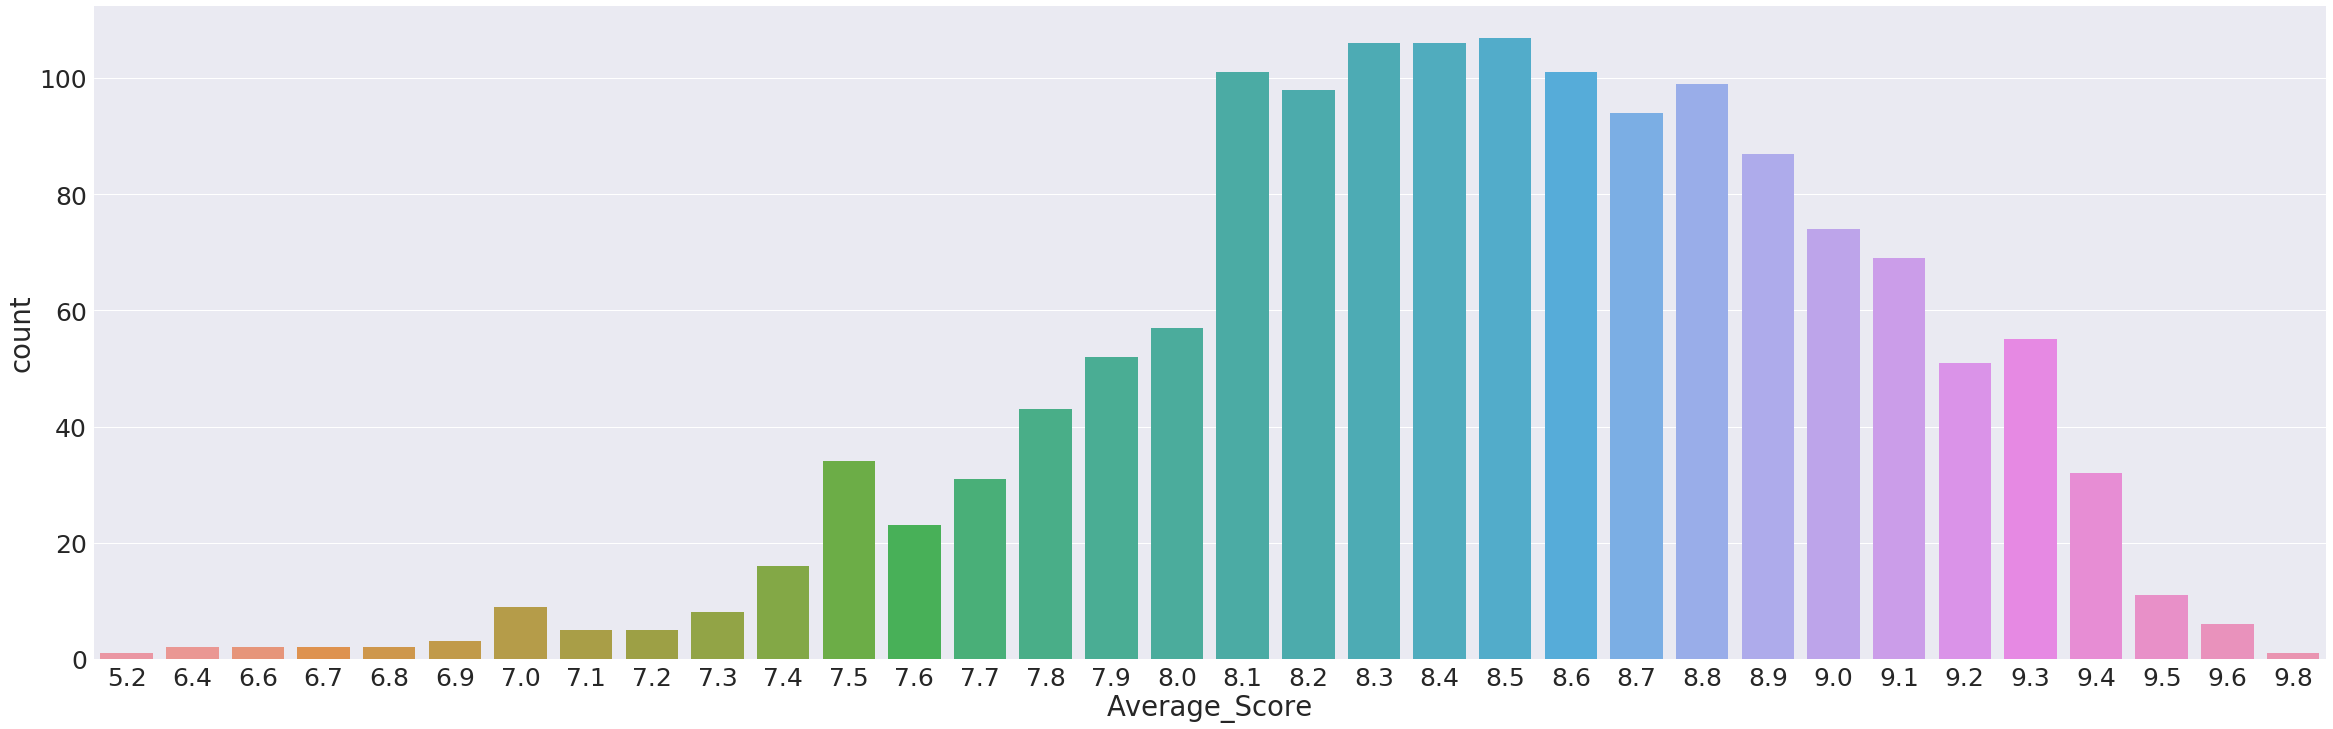

In [40]:
from matplotlib import pyplot
data_plot = raw_df[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (40, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

In [123]:
raw_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Positive_Probability,Negative_Probability,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0.72,0.28,Positive
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0.640625,0.359375,Positive
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,0.7878787878787878,0.21212121212121213,Positive
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,0.680672268907563,0.31932773109243695,Positive
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,0.5409836065573771,0.45901639344262296,Positive
